In [863]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [864]:
data = pd.read_csv("data.csv")

In [865]:
data["busi_date"] = pd.to_datetime(data["busi_date"])
data["industry"] = data["industry"].str.replace(" ","")
data["industry"] = data["industry"].str.lstrip("ind")
data["industry"] = data["industry"].str.zfill(2)
data["industry"] = "ind"+ data["industry"]

In [866]:
industry_data = pd.DataFrame(data.groupby(["busi_date","industry"])["ttl_weight"].sum())

In [867]:
data = pd.DataFrame(data.groupby(["busi_date","order_book_id"])["ttl_weight"].sum())

In [868]:
grouped = data.groupby(level='busi_date')
data['rank'] = grouped['ttl_weight'].rank(ascending=False, method='min')
top_weights = list(range(1,501))
top_weights_df = data[data['rank'].isin(top_weights)]
top_weights_df = top_weights_df.sort_values(by = ["busi_date","rank"])
top_weights_df = top_weights_df.reset_index()
df = top_weights_df.pivot_table(index = "busi_date", columns = "rank",values = "ttl_weight").reset_index()

In [869]:
grouped_industry = industry_data.groupby(level='busi_date')
industry_data['rank'] = grouped_industry['ttl_weight'].rank(ascending=False, method='min')
top_weights = list(range(1,31))
top_weights_industry = industry_data[industry_data['rank'].isin(top_weights)]
top_weights_industry = top_weights_industry.sort_values(by = ["busi_date","rank"])
top_weights_industry = top_weights_industry.reset_index()
df2 = top_weights_industry.pivot_table(index = "busi_date", columns = "rank",values = "ttl_weight").reset_index()

In [870]:
# df.plot(x="busi_date",kind = "bar", stacked = True,figsize = (20,10))

In [878]:
final_stock_weight = pd.DataFrame()
final_stock_weight[1] = df.iloc[:,0:2].sum(axis=1)
final_stock_weight[10] = df.iloc[:,2:11].sum(axis=1)
final_stock_weight[50] = df.iloc[:,11:51].sum(axis=1)
final_stock_weight[100] = df.iloc[:,51:101].sum(axis=1)
final_stock_weight[300] = df.iloc[:,101:301].sum(axis=1)
final_stock_weight[500] = df.iloc[:,301:501].sum(axis=1)
final_stock_weight.index = df["busi_date"].dt.date

In [879]:
final_industry_weight = pd.DataFrame()
final_industry_weight[5] = df2.iloc[:,1:6].sum(axis=1)
final_industry_weight[10] = df2.iloc[:,6:11].sum(axis=1)
final_industry_weight[15] = df2.iloc[:,11:16].sum(axis=1)
final_industry_weight[20] = df2.iloc[:,16:21].sum(axis=1)
final_industry_weight[30] = df2.iloc[:,21:31].sum(axis=1)
final_industry_weight.index = df2["busi_date"].dt.date

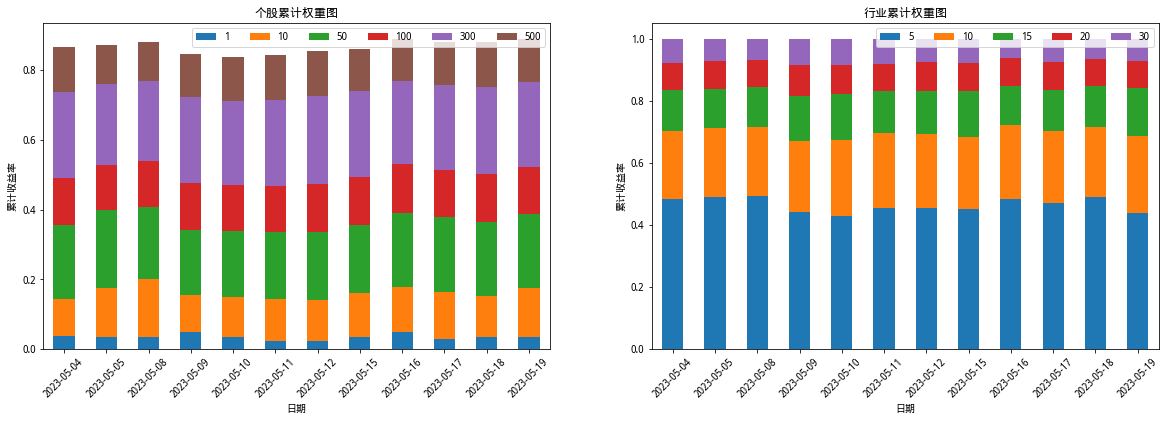

In [886]:
plt.figure(figsize=(20,6))
ax=plt.subplot(121)
final_stock_weight.plot.bar(stacked=True,ax=ax)
ax.set_xticklabels(final_stock_weight.index, rotation = 45)
ax.set(title="个股累计权重图", xlabel='日期', ylabel='累计收益率')
ax.legend(loc = "upper right", ncol = 6)


ax=plt.subplot(122)
final_industry_weight.plot.bar(stacked=True,ax=ax)
ax.set_xticklabels(final_industry_weight.index, rotation = 45)
ax.set(title="行业累计权重图", xlabel='日期', ylabel='累计收益率')
ax.legend(loc = "upper right", ncol = 5)